Submitted by - Aishwarya Parida, Anmol Aggarwal, Sankalp Kulkarni, Shrishty Mishra

***Q2 Billboard data wrangling***

A - Make a table of the top 10 most popular songs since 1958, as measured by the total number of weeks that a song spent on the Billboard Top 100. Note that these data end in week 22 of 2021, so the most popular songs of 2021 will not have up-to-the-minute data; please send our apologies to The Weeknd.

Your table should have 10 rows and 3 columns: performer, song, and count, where count represents the number of weeks that song appeared in the Billboard Top 100. Make sure the entries are sorted in descending order of the count variable, so that the more popular songs appear at the top of the table. Give your table a short caption describing what is shown in the table.
    
B - Is the musical diversity of the Billboard Top 100 changing over time? Let us find out. We will measure the musical diversity of given year as the number of unique songs that appeared in the Billboard Top 100 that year. Make a line graph that plots this measure of musical diversity over the years. The x axis should show the year, while the y axis should show the number of unique songs appearing at any position on the Billboard Top 100 chart in any week that year. For this part, please filter the data set so that it excludes the years 1958 and 2021, since we do not have complete data on either of those years. Give the figure an informative caption in which you explain what is shown in the figure and comment on any interesting trends you see.

There are number of ways to accomplish the data wrangling here. For example, you could use two distinct sets of data-wrangling steps. The first set of steps would get you a table that counts the number of times that a given song appears on the Top 100 in a given year. The second set of steps operate on the result of the first set of steps; it would count the number of unique songs that appeared on the Top 100 in each year, irrespective of how many times it had appeared.

C - Let us define a ten-week hit as a single song that appeared on the Billboard Top 100 for at least ten weeks. There are 19 artists in U.S. musical history since 1958 who have had at least 30 songs that were "ten-week hits." Make a bar plot for these 19 artists, showing how many ten-week hits each one had in their musical career. Give the plot an informative caption in which you explain what is shown.    

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
billboard_df = pd.read_csv('billboard.csv')
billboard_df.columns.values

array(['Unnamed: 0', 'url', 'week_id', 'week_position', 'song',
       'performer', 'song_id', 'instance', 'previous_week_position',
       'peak_position', 'weeks_on_chart', 'year', 'week'], dtype=object)

In [22]:
billboard_df['song'].value_counts()

song
Stay                              208
Angel                             205
Hold On                           200
Heaven                            194
I Like It                         188
                                 ... 
Child Of God                        1
Dance With Me Georgie               1
Private Eye                         1
(Night Time Is) The Right Time      1
Sanctified                          1
Name: count, Length: 24360, dtype: int64

***Q2 - Part a***

In [23]:
#Q2 part a
top_songs = billboard_df.groupby(['performer', 'song']).size().reset_index(name='Count')

top_songs = top_songs.sort_values(by='Count', ascending=False)

# Getting the top 10 songs
top_10_songs = top_songs.head(10)

# Display the top 10 songs with their counts
top_10_songs

,performer,song,Count
11194,Imagine Dragons,Radioactive,87
403,AWOLNATION,Sail,79
27121,The Weeknd,Blinding Lights,76
12026,Jason Mraz,I'm Yours,76
15008,LeAnn Rimes,How Do I Live,69
18752,OneRepublic,Counting Stars,68
14807,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
12421,Jewel,Foolish Games/You Were Meant For Me,65
506,Adele,Rolling In The Deep,65
4347,Carrie Underwood,Before He Cheats,64


***Q2 - part b***

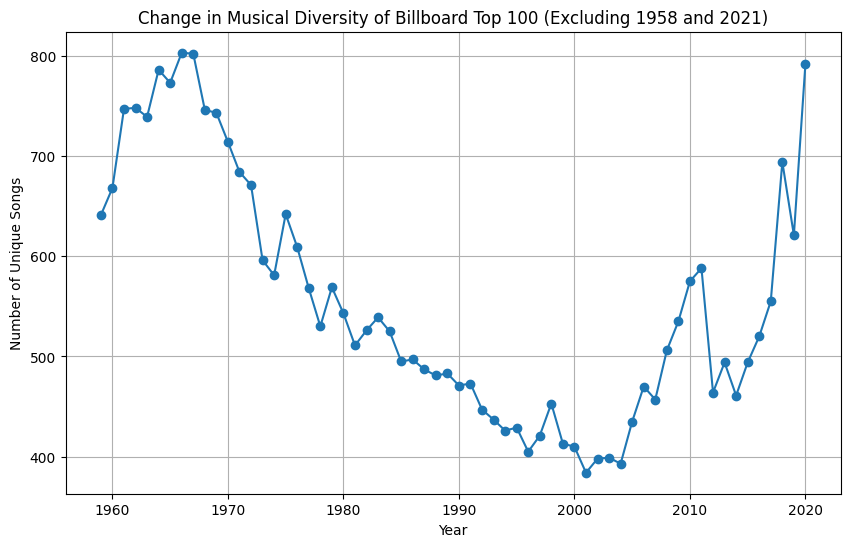

In [25]:
#Q2 b
# Filtering out the years 1958 and 2021
filtered_df = billboard_df[(billboard_df['year'] != 1958) & (billboard_df['year'] != 2021)]

# Grouping by 'year' and 'song' and calculate the number of times each song appears in a given year
song_counts = filtered_df.groupby(['year', 'song']).size().reset_index(name='Count')

# Grouping by 'year' and count the number of unique songs in each year
unique_song_counts = song_counts.groupby('year')['song'].count().reset_index(name='UniqueSongs')

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(unique_song_counts['year'], unique_song_counts['UniqueSongs'], marker='o')
plt.title("Change in Musical Diversity of Billboard Top 100 (Excluding 1958 and 2021)")
plt.xlabel("Year")
plt.ylabel("Number of Unique Songs")
plt.grid(True)
plt.show()

***Q2 - part c***

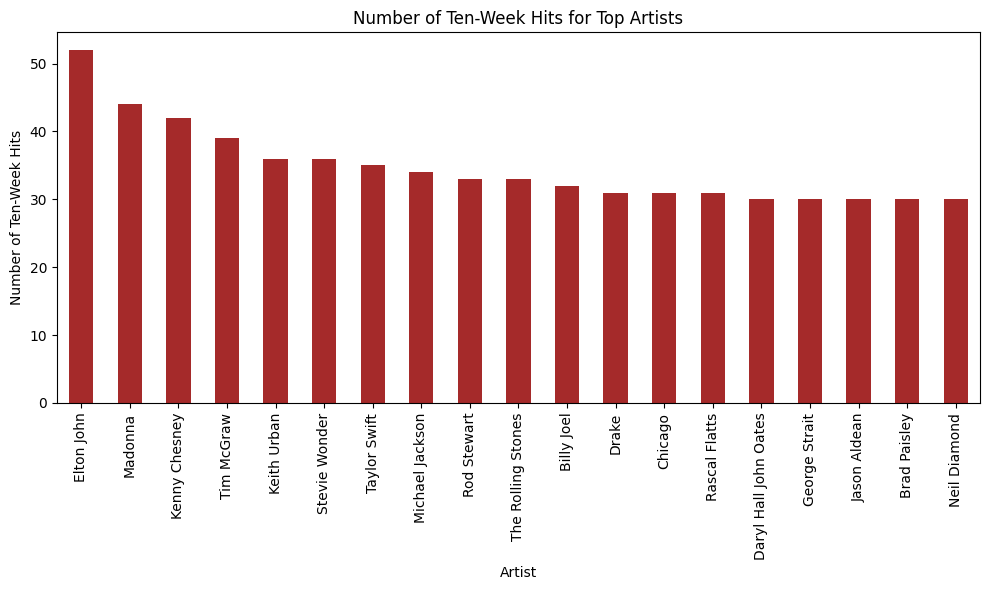

In [29]:
#Q2 c

#Getting Top ten week hits
ten_week_hits = billboard_df[billboard_df['weeks_on_chart'] >= 10].groupby('performer')['song'].nunique()
ten_week_hits = ten_week_hits[ten_week_hits >= 30]

#plotting the graph
plt.figure(figsize=(10, 6))
ten_week_hits.sort_values(ascending=False).plot(kind='bar', color='brown')
plt.xlabel('Artist')
plt.ylabel('Number of Ten-Week Hits')
plt.title('Number of Ten-Week Hits for Top Artists')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()